In [14]:
# Scrape human made images

In [2]:
!pip install selenium

     ---------------------------------------- 6.6/6.6 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 384.9/384.9 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.2 MB/s eta 0:00:00


In [3]:
from multiprocessing.sharedctypes import Value
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
import io
from datetime import datetime as dt
from PIL import Image
import time
import os
import urllib

In [7]:
HUMAN = 'C:\\Users\\Uzma\\Desktop\\HUMAN\\'

In [8]:
# Download the driver from chromedriver website for relevant OS i.e. MAC, Windows, Debian, etc.
PATH = 'C:\\Users\\Uzma\\Desktop\\chromedriver_win32\\chromedriver'


In [20]:
urls = ['https://www.google.com/search?q=art+graphic+design&tbm=isch&ved=2ahUKEwisiM6s2pr-AhXPGTQIHXYSB84Q2-cCegQIABAA&oq=art+graphic+design&gs_lcp=CgNpbWcQAzIHCAAQigUQQzIHCAAQigUQQzIHCAAQigUQQzIHCAAQigUQQzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJ1DxAliJCmDFDmgAcAB4AIABb4gB1AWSAQM3LjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=bZYxZOydC8-z0PEP9qSc8Aw&bih=609&biw=1280',
       'https://www.google.com/search?q=anime+art&tbm=isch&ved=2ahUKEwjdz9iv2pr-AhUyAzQIHXdzAjMQ2-cCegQIABAA&oq=anime+art&gs_lcp=CgNpbWcQAzIKCAAQigUQsQMQQzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoHCAAQigUQQzoECCMQJ1DjBFinDWDoD2gAcAB4AIABbIgBvgeSAQM3LjOYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=c5YxZJ3KJ7KG0PEP9-aJmAM&bih=609&biw=1280',
       'https://www.google.com/search?q=people+outside&tbm=isch&ved=2ahUKEwid5LC33pr-AhX0HzQIHWLOAkMQ2-cCegQIABAA&oq=people+outside&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQ6BAgjECc6BwgAEIoFEEM6CggAEIoFELEDEEM6CAgAEIAEELEDOggIABCxAxCDAToGCAAQCBAeUMsIWNkrYJUsaARwAHgAgAFtiAHPDJIBBDE2LjKYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=tZoxZN21H_S_0PEP4pyLmAQ&bih=609&biw=1280',
       'https://www.google.com/search?q=digital+art&tbm=isch&ved=2ahUKEwjejJ7B3pr-AhWLATQIHQqgCDMQ2-cCegQIABAA&oq=digital+art&gs_lcp=CgNpbWcQAzIKCAAQigUQsQMQQzIHCAAQigUQQzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEOgQIIxAnOggIABCABBCxAzoICAAQsQMQgwFQlgVY7Q9guRRoAHAAeACAAWmIAdgIkgEEMTAuMpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=ypoxZN7_CouD0PEPisCimAM&bih=609&biw=1280',
       'https://www.google.com/search?q=digital+art&tbm=isch&chips=q:digital+art,g_1:portrait:rxaMKhJ3aNU%3D&hl=en&sa=X&ved=2ahUKEwiazeWH35r-AhUTJ30KHXJpCOoQ4lYoBHoECAEQLg&biw=1263&bih=609',
       'https://www.google.com/search?q=digital+art&tbm=isch&chips=q:digital+art,g_1:drawing:wv9WUjQunSk%3D&hl=en&sa=X&ved=2ahUKEwiazeWH35r-AhUTJ30KHXJpCOoQ4lYoBnoECAEQMg&biw=1263&bih=609',
       'https://www.google.com/search?q=abstract+art&tbm=isch&ved=2ahUKEwixmvia35r-AhXMBTQIHWKLBCkQ2-cCegQIABAA&oq=abstract+art&gs_lcp=CgNpbWcQAzIKCAAQigUQsQMQQzIHCAAQigUQQzIHCAAQigUQQzIHCAAQigUQQzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJ1CwBFjxD2CPEmgAcAB4AIABaYgBowmSAQQxMS4ymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=hpsxZLG_EsyL0PEP4paSyAI&bih=609&biw=1263&hl=en',
       'https://www.google.com/search?q=paintings&tbm=isch&ved=2ahUKEwjirOTF35r-AhULHDQIHQXqChwQ2-cCegQIABAA&oq=paintings&gs_lcp=CgNpbWcQAzIKCAAQigUQsQMQQzIHCAAQigUQQzIHCAAQigUQQzIHCAAQigUQQzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJ1C9DVi1EmDwE2gAcAB4AIABqAGIAeMIkgEDNS41mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=4JsxZOK8CYu40PEPhdSr4AE&bih=609&biw=1263&hl=en',
       'https://www.google.com/search?q=cartoon&tbm=isch&ved=2ahUKEwid9c-W4Jr-AhVgADQIHf3LAdYQ2-cCegQIABAA&oq=cartoon&gs_lcp=CgNpbWcQAzIKCAAQigUQsQMQQzIHCAAQigUQQzIKCAAQigUQsQMQQzIKCAAQigUQsQMQQzIHCAAQigUQQzIHCAAQigUQQzIKCAAQigUQsQMQQzIKCAAQigUQsQMQQzIHCAAQigUQQzIICAAQgAQQsQM6BAgjECc6BQgAEIAEUMgEWOwMYKMOaABwAHgAgAFviAHjBZIBAzcuMZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=iZwxZN2MKuCA0PEP_ZeHsA0&bih=609&biw=1263&hl=en',
       'https://www.google.com/search?q=animals&tbm=isch&ved=2ahUKEwixnMK34Jr-AhWKBzQIHdT6AE8Q2-cCegQIABAA&oq=animals&gs_lcp=CgNpbWcQAzIICAAQgAQQsQMyCwgAEIAEELEDEIMBMgUIABCABDIFCAAQgAQyCAgAEIAEELEDMgUIABCABDIICAAQgAQQsQMyBQgAEIAEMgUIABCABDIFCAAQgAQ6BAgjECc6CggAEIoFELEDEEM6BwgAEIoFEENQrAVY6gpg9wtoAHAAeACAAW2IAeMFkgEDNy4xmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=zpwxZLH9KIqP0PEP1PWD-AQ&bih=609&biw=1263&hl=en',
       'https://www.google.com/search?q=drawings&tbm=isch&ved=2ahUKEwixnMK34Jr-AhWKBzQIHdT6AE8Q2-cCegQIABAA&oq=drawings&gs_lcp=CgNpbWcQAzIKCAAQigUQsQMQQzIHCAAQigUQQzIHCAAQigUQQzIKCAAQigUQsQMQQzIHCAAQigUQQzIHCAAQigUQQzIHCAAQigUQQzIHCAAQigUQQzIHCAAQigUQQzIHCAAQigUQQzoECCMQJzoFCAAQgAQ6CAgAEIAEELEDUPYEWKEMYOwMaABwAHgAgAFyiAH1BZIBAzcuMZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=zpwxZLH9KIqP0PEP1PWD-AQ&bih=609&biw=1263&hl=en',
        'https://www.google.com/search?q=people+doing+things+real&tbm=isch&ved=2ahUKEwjQ-9ST95r-AhXhGTQIHWqpDgEQ2-cCegQIABAA&oq=people+doing+things+real&gs_lcp=CgNpbWcQAzIGCAAQCBAeOgQIIxAnOgcIABCKBRBDOgUIABCABDoGCAAQBRAeUIEDWNcHYKQJaABwAHgAgAGoAYgBsQWSAQMyLjSYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=obQxZJCnHuGz0PEP6tK6CA&bih=609&biw=1280',
        'https://www.google.com/search?q=portraits&tbm=isch&chips=q:portraits,g_1:photography:G7hcdP5jhN0%3D&hl=en&sa=X&ved=2ahUKEwj9tra295r-AhW2GTQIHYkLApAQ4lYoAnoECAEQKg&biw=1263&bih=609',
        'https://www.google.com/search?q=watercolour&tbm=isch&ved=2ahUKEwiDrJ6v_5r-AhURAzQIHWRjBnIQ2-cCegQIABAA&oq=watercolour&gs_lcp=CgNpbWcQAzIICAAQgAQQsQMyCAgAEIAEELEDMggIABCABBCxAzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQ6BAgjECc6BwgAEIoFEENQ5QZYjw9glhBoAHAAeACAAW-IAcQGkgEDNy4ymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=Pr0xZIOVMZGG0PEP5MaZkAc&bih=609&biw=1263&hl=en',
        'https://www.google.com/search?q=oil+painting&tbm=isch&ved=2ahUKEwi5l56y_5r-AhX6HDQIHQlkBZ4Q2-cCegQIABAA&oq=oi&gs_lcp=CgNpbWcQARgAMgoIABCKBRCxAxBDMgcIABCKBRBDMgcIABCKBRBDMgoIABCKBRCxAxBDMggIABCABBCxAzIICAAQgAQQsQMyCAgAEIAEELEDMggIABCABBCxAzIICAAQgAQQsQMyBQgAEIAEOgQIIxAnOggIABCxAxCDAVDECljhC2CiF2gAcAB4AIABY4gBkAKSAQEzmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=Rb0xZPngBfq50PEPiciV8Ak&bih=609&biw=1263&hl=en'
       ]

categories = ['a_graphic_deisgn_art', 'b_anime_art', 'c_people_outside', 'd_digital_art', 
              'e_digital_art_portrait', 'f_igital_art_drawing', 'g_abstract_art', 'h_paintings', 'i_cartoon',
             'j_animals', 'k_drawings', 'l_people_doing_things','m_real_portraits', 'n_watercolour', 'o_oil' ]

def scroll_down(wd):
    wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(delay)
    
    
image_urls = set()

for search in range(len(urls))[14:]:
    url = urls[search]
    category = categories[search]
    
    wd = webdriver.Chrome(executable_path=PATH)


    wd.get(url)
    delay = 0

    skips = 0
    before = 100


    while skips<=50:

        if len(image_urls)%100 == 0:
            print(len(image_urls))

        thumbnails = wd.find_elements(By.CLASS_NAME, "Q4LuWd")
        time.sleep(3)
        for img in thumbnails:
            src = img.get_attribute('src')
            if src not in image_urls:
                image_urls.add(img.get_attribute('src'))
                try:
                    urllib.request.urlretrieve(img.get_attribute('src'),HUMAN + category + '_' + str(len(image_urls)) + '.png')            
                except:
                    continue        

        skips +=1
        
        scroll_down(wd)


    wd.quit()

C:\Users\Uzma\AppData\Local\Temp\ipykernel_8672\2459051848.py:33: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(executable_path=PATH)


0


StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=113.0.5672.93)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00A88893+48451]
	(No symbol) [0x00A1B8A1]
	(No symbol) [0x00925058]
	(No symbol) [0x0092E1F3]
	(No symbol) [0x009286C8]
	(No symbol) [0x009286A6]
	(No symbol) [0x00927853]
	(No symbol) [0x00929DEB]
	(No symbol) [0x0097CDD9]
	(No symbol) [0x0096A2BC]
	(No symbol) [0x0097C482]
	(No symbol) [0x0096A0B6]
	(No symbol) [0x00947E08]
	(No symbol) [0x00948F2D]
	GetHandleVerifier [0x00CE8E3A+2540266]
	GetHandleVerifier [0x00D28959+2801161]
	GetHandleVerifier [0x00D2295C+2776588]
	GetHandleVerifier [0x00B12280+612144]
	(No symbol) [0x00A24F6C]
	(No symbol) [0x00A211D8]
	(No symbol) [0x00A212BB]
	(No symbol) [0x00A14857]
	BaseThreadInitThunk [0x757100C9+25]
	RtlGetAppContainerNamedObjectPath [0x770F7B4E+286]
	RtlGetAppContainerNamedObjectPath [0x770F7B1E+238]


In [21]:
# Scrape DALLE images

In [22]:
def scroll_down(wd):
    wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(delay)
wd = webdriver.Chrome(executable_path=PATH)
url = 'https://dalle2.gallery/#search-random'

wd.get(url)
max_images = 100
delay = 0
image_urls = set()
skips = 0
before = 100

while len(image_urls) < max_images:

    if len(image_urls)%100 == 0:
        print(len(image_urls))

    thumbnails = wd.find_elements(By.TAG_NAME, 'img')
    time.sleep(1)
    for img in thumbnails:

#             try:
#                 img.click()
#                 time.sleep(delay)
#             except:
#                 continue
        try:
            src = img.get_attribute('src')
            if src not in image_urls:
                image_urls.add(img.get_attribute('src'))
                try:
                    urllib.request.urlretrieve(img.get_attribute('src'),DALLE + str(len(image_urls)) + '.png')            
                except:
                    continue        
#             if len(image_urls) == before:
#                 scroll_down(wd)

#             before = len(image_urls
        except:
            break
    scroll_down(wd)
    
wd.quit()

C:\Users\Uzma\AppData\Local\Temp\ipykernel_8672\2642686642.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(executable_path=PATH)


0


In [23]:
!pip install webp

In [24]:
from keras.preprocessing.image import ImageDataGenerator
import pickle as pkl

from PIL import Image
import numpy as np
import os
import webp
import random

In [26]:
### RANDOMNLY SELECT TEST AND TRAINING SAMPLES
human_files = os.listdir('C:\\Users\\Uzma\\Desktop\\HUMAN\\')
human_train = random.sample(human_files, 4500)
human_test = [i for i in human_files if i not in human_train]

dalle_files = os.listdir('C:\\Users\\Uzma\\Desktop\\DALLE\\')
dalle_train = random.sample(dalle_files, 4500)
dalle_test = [i for i in dalle_files if i not in dalle_train]

ValueError: Sample larger than population or is negative

In [27]:
with open('D:\\dalle_classifier\\file_names\\' + 'train.pickle', 'wb') as f:
        pkl.dump([human_train,dalle_train], f)

with open('D:\\dalle_classifier\\file_names\\' + 'test.pickle', 'wb') as f:
        pkl.dump([human_test,dalle_test], f)
 

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\dalle_classifier\\file_names\\train.pickle'

In [28]:
#### CREATE TRAINING BATCHES, 5 BATCHES OF 1800 IMAGES EACH (EQUAL DALLE AND HUMAN SPLIT)
for batch in tqdm(range(5)):
    data = []
    labels = []
    human_path = ('C:\\Users\\Uzma\\Desktop\\HUMAN\\')
    for path in human_train[batch*900:(batch+1)*900]:

        # Load the image from file
        img = Image.open(human_path + path).resize((255,245))

        # Convert the image to a numpy array
        data.append(np.array(img.convert("RGB"))/255.)
        labels.append(0)


    dalle_path = ('C:\\Users\\Uzma\\Desktop\\DALLE\\')
    for path in dalle_train[batch*900:(batch+1)*900]:

        # Load the image from file
        img = webp.load_image(dalle_path + path, 'RGB').resize((256,256)).crop((0,0,255,245))

        # Convert the image to a numpy array
        data.append(np.array(img)/255.)
        labels.append(1)

    c = list(zip(data, labels))

    random.shuffle(c)

    data, labels = zip(*c)
    with open('D:\\dalle_classifier\\train_batches\\' + str(batch) + '.pickle', 'wb') as f:
        pkl.dump([np.stack(data),np.array(labels)], f)
        
        
    del data
    del labels

NameError: name 'tqdm' is not defined

In [ ]:
    
### CREATE TEST SET
data = []
labels = []
human_path = ('C:\\Users\\Uzma\\Desktop\\HUMAN\\')
for path in human_test:

    # Load the image from file
    img = Image.open(human_path + path).resize((255,245))

    # Convert the image to a numpy array
    data.append(np.array(img.convert("RGB"))/255.)
    labels.append(0)


dalle_path = ('C:\\Users\\Uzma\\Desktop\\DALLE\\')
for path in dalle_test:

    # Load the image from file
    img = webp.load_image(dalle_path + path, 'RGB').resize((256,256)).crop((0,0,255,245))

    # Convert the image to a numpy array
    data.append(np.array(img)/255.)
    labels.append(1)
    
with open('D:\\dalle_classifier\\test_batch\\' + 'test_batch.pickle', 'wb') as f:
    pkl.dump([np.stack(data),np.array(labels)], f)

del data
del labels

    

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(245, 255, 3)),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),

    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate =0.00005)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', ])

In [30]:
import pickle as pkl
import os
import gc

results = []

#Load test set
with open('D:\\dalle_classifier\\test_batch\\' + 'test_batch.pickle', 'rb') as f:
    test = pkl.load(f)

for epoch in range(10):
    total = 0
    
    #Load train set
    batch_path = 'D:\\dalle_classifier\\train_batches\\'
    for batch in os.listdir(batch_path):
        with open(batch_path + batch , 'rb') as f:
            train = pkl.load(f)
        
        #Train model
        
        hh = model.fit(train[0], train[1], epochs=1, validation_data= (test[0], test[1]))
        gc.collect()
        keras.backend.clear_session()
        
        
        #Save results
        results.append([ hh.history['val_accuracy'][0], hh.history['accuracy'][0]])
        

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\dalle_classifier\\test_batch\\test_batch.pickle'

In [31]:
# model.save('D:\\dalle_classifier\\model.h5')
# with open('D:\\dalle_classifier\\accuracy.pickle', 'wb') as f:
#     pkl.dump(results, f)

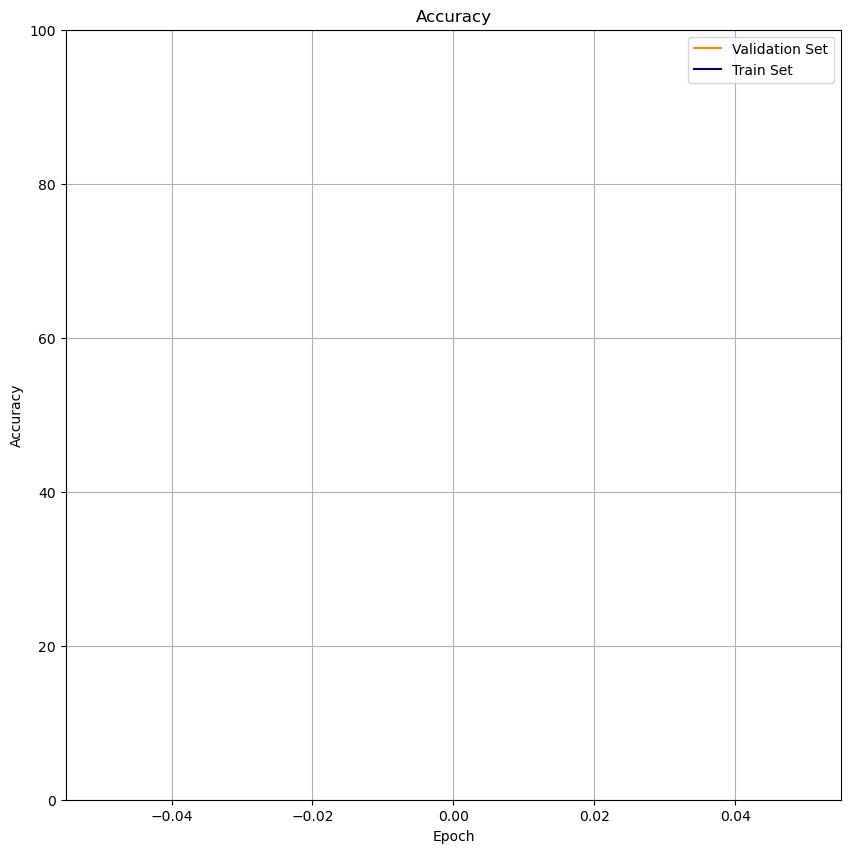

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.title('Accuracy')

plt.plot([i for i in range(len(results)+1)],[0] + [i[0]*100 for i in results],color='darkorange', label = 'Validation Set')
plt.plot( [i for i in range(len(results)+1)], [0] + [i[1]*100 for i in results],color='navy', label = 'Train Set')

plt.grid()
plt.legend()
plt.ylim(0,100)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


y_pred = np.round(model.predict(test[0]))
y_true = test[1]


# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define labels
labels = ['Human', 'DALLE-2']

# Create heatmap with labels
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

NameError: name 'test' is not defined

In [34]:
from sklearn.metrics import roc_curve, auc

# Example true and predicted labels and probabilities
y_pred_proba = model.predict(test[0])

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

NameError: name 'test' is not defined

In [35]:
test_files[0][100]

NameError: name 'test_files' is not defined

In [36]:
print(y_pred_proba[100])

NameError: name 'y_pred_proba' is not defined